<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,70.176774,-0.002254,80.174520,80.176664,-0.002143
1,0.0,1.0,91.310464,-0.001484,101.308980,101.310195,-0.001214
2,0.0,2.0,99.397083,0.001360,109.398443,109.396752,0.001691
3,0.0,3.0,26.615433,0.004022,36.619455,36.615649,0.003806
4,0.0,4.0,65.134914,-0.002204,75.132710,75.134841,-0.002131
...,...,...,...,...,...,...,...
59995,999.0,55.0,31.282209,-0.003073,41.279136,41.281703,-0.002567
59996,999.0,56.0,70.583231,-0.000435,80.582795,80.582429,0.000366
59997,999.0,57.0,38.522650,-0.007636,48.515015,48.522090,-0.007076
59998,999.0,58.0,47.978360,-0.000661,57.977699,57.977728,-0.000030


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,70.176774,-0.002254,80.174520,80.176664,-0.002143
1,0.0,1.0,91.310464,-0.001484,101.308980,101.310195,-0.001214
2,0.0,2.0,99.397083,0.001360,109.398443,109.396752,0.001691
3,0.0,3.0,26.615433,0.004022,36.619455,36.615649,0.003806
4,0.0,4.0,65.134914,-0.002204,75.132710,75.134841,-0.002131
...,...,...,...,...,...,...,...
59995,999.0,55.0,31.282209,-0.003073,41.279136,41.281703,-0.002567
59996,999.0,56.0,70.583231,-0.000435,80.582795,80.582429,0.000366
59997,999.0,57.0,38.522650,-0.007636,48.515015,48.522090,-0.007076
59998,999.0,58.0,47.978360,-0.000661,57.977699,57.977728,-0.000030


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    70.176774 -0.002254   80.174520   80.176664 -0.002143
      1.0    91.310464 -0.001484  101.308980  101.310195 -0.001214
      2.0    99.397083  0.001360  109.398443  109.396752  0.001691
      3.0    26.615433  0.004022   36.619455   36.615649  0.003806
      4.0    65.134914 -0.002204   75.132710   75.134841 -0.002131
...                ...       ...         ...         ...       ...
999.0 55.0   31.282209 -0.003073   41.279136   41.281703 -0.002567
      56.0   70.583231 -0.000435   80.582795   80.582429  0.000366
      57.0   38.522650 -0.007636   48.515015   48.522090 -0.007076
      58.0   47.978360 -0.000661   57.977699   57.977728 -0.000030
      59.0   23.191272  0.008764   33.200036   33.190827  0.009209

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    70.176774 -0.002254   80.174520   80.176664 -0.002143
      1.0    91.310464 -0.001484  101.308980  101.310195 -0.001214
      2.0    99.397083  0.001360  109.398443  109.396752  0.001691
      3.0    26.615433  0.004022   36.619455   36.615649  0.003806
      4.0    65.134914 -0.002204   75.132710   75.134841 -0.002131
...                ...       ...         ...         ...       ...
999.0 55.0   31.282209 -0.003073   41.279136   41.281703 -0.002567
      56.0   70.583231 -0.000435   80.582795   80.582429  0.000366
      57.0   38.522650 -0.007636   48.515015   48.522090 -0.007076
      58.0   47.978360 -0.000661   57.977699   57.977728 -0.000030
      59.0   23.191272  0.008764   33.200036   33.190827  0.009209

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,70.176774,-0.002254,80.174520,80.176664,-0.002143
1,0.0,1.0,91.310464,-0.001484,101.308980,101.310195,-0.001214
2,0.0,2.0,99.397083,0.001360,109.398443,109.396752,0.001691
3,0.0,3.0,26.615433,0.004022,36.619455,36.615649,0.003806
4,0.0,4.0,65.134914,-0.002204,75.132710,75.134841,-0.002131
...,...,...,...,...,...,...,...
59995,999.0,55.0,31.282209,-0.003073,41.279136,41.281703,-0.002567
59996,999.0,56.0,70.583231,-0.000435,80.582795,80.582429,0.000366
59997,999.0,57.0,38.522650,-0.007636,48.515015,48.522090,-0.007076
59998,999.0,58.0,47.978360,-0.000661,57.977699,57.977728,-0.000030


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    70.176774 -0.002254   80.174520   80.176664 -0.002143
      1.0    91.310464 -0.001484  101.308980  101.310195 -0.001214
      2.0    99.397083  0.001360  109.398443  109.396752  0.001691
      3.0    26.615433  0.004022   36.619455   36.615649  0.003806
      4.0    65.134914 -0.002204   75.132710   75.134841 -0.002131
...                ...       ...         ...         ...       ...
999.0 55.0   31.282209 -0.003073   41.279136   41.281703 -0.002567
      56.0   70.583231 -0.000435   80.582795   80.582429  0.000366
      57.0   38.522650 -0.007636   48.515015   48.522090 -0.007076
      58.0   47.978360 -0.000661   57.977699   57.977728 -0.000030
      59.0   23.191272  0.008764   33.200036   33.190827  0.009209

[60000 rows x 5 columns]

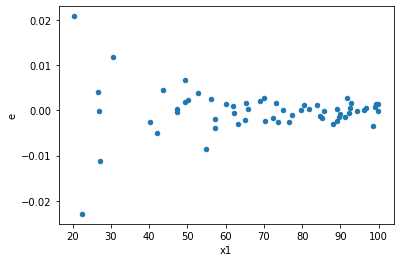

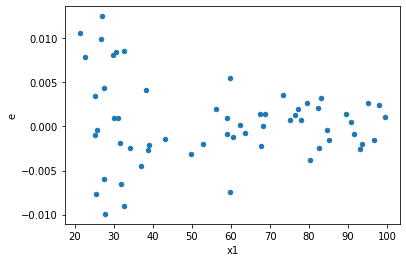

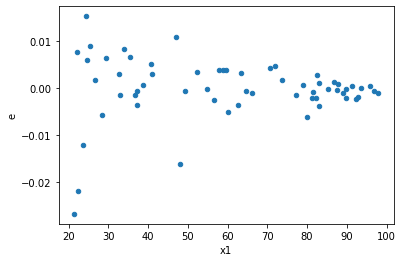

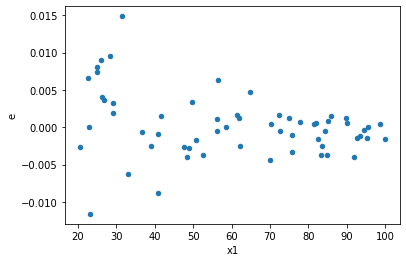

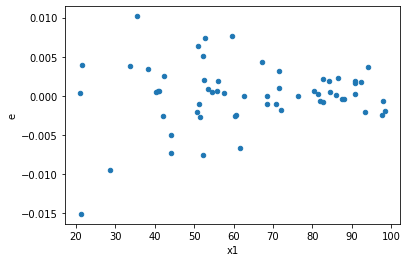

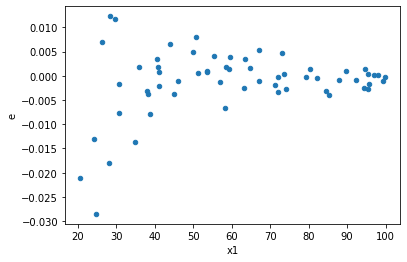

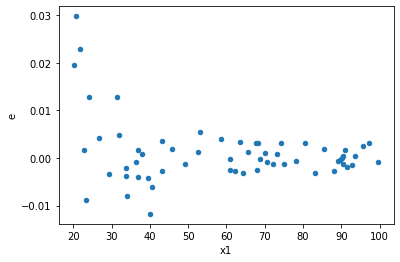

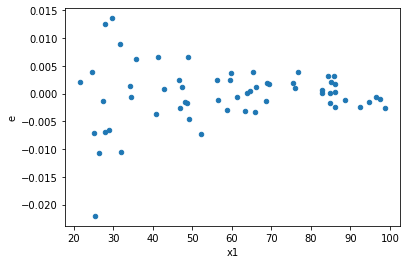

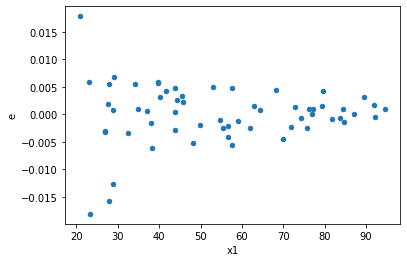

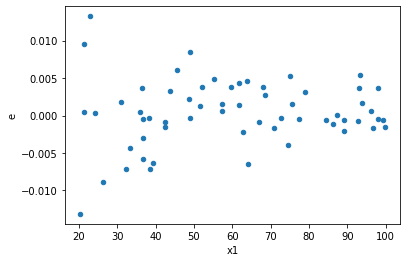

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.001470385863208806,5.1625215331953645e-05,6.39298201395133e-05,2.2445745796501586e-06,0.03510997801576556,1.2466148822176106e-11,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.000925075312455418,9.822419589330372e-05,4.022066575893122e-05,4.270617212752336e-06,0.1061796748554323,1.0358203296519215e-06,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,0.0023280347199288462,8.258989461158507e-05,0.00010121890086647158,3.590864983112394e-06,0.03547622975919763,1.3941770719480905e-11,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,0.0007834514320129731,6.546746643509643e-05,3.406310573969448e-05,2.846411584134627e-06,0.08356289076769771,1.0177238126658442e-07,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.0007171036064696946,6.084893761655587e-05,3.117841767259542e-05,2.645605983328516e-06,0.0848537604156191,1.1838892802760878e-07,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,0.0018625890275657676,8.400380250728452e-05,8.098213163329425e-05,3.652339239447153e-06,0.045100556947374346,1.8127024423997846e-10,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.0016139422891180313,7.53821491912524e-05,7.017140387469701e-05,3.2774847474457564e-06,0.04670684305102779,2.6244501303946333e-10,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,0.0013966515930035662,8.770589944138155e-05,6.072398230450288e-05,3.813299975712241e-06,0.06279726445789233,5.725032874700554e-09,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,0.0013853328076211136,9.613738066997316e-05,6.0231861200917985e-05,4.17988611608579e-06,0.06939659563470511,1.585637708084418e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    997
Reject001=1 : Homoscedasticity        3
Name: Result_test, dtype: int64